In [2]:
## Importing libraries
import numpy as np 
import nashpy as nash

In [15]:
## Defining payoff matrices
A = np.array([[0,1],[-100, 2]])
B = np.transpose(A)

In [16]:
## Creating the Game object
cold_war = nash.Game(A,B)
cold_war

Bi matrix game with payoff matrices:

Row player:
[[   0    1]
 [-100    2]]

Column player:
[[   0 -100]
 [   1    2]]

In [19]:
## Solving with support enumeration
equilibrium = cold_war.support_enumeration()

## printing equilibrium
for eq in equilibrium:
    print(eq)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.00990099, 0.99009901]), array([0.00990099, 0.99009901]))


In [22]:
## The first two are the pure NE
## The last one is the mixed NE with p(N) = 1/101 

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [85]:
# Defining the range of c1 and c2
c1 = np.linspace(-0.01,-100, 100)
c2 = np.linspace(-0.01,-20, 15)

C1, C2 = np.meshgrid(c1,c2)

In [86]:
# defining function that returns the probability
def find_ne_prob(c1, c2):
    A = np.array([[0,1],[c1, 2]])
    B = np.array([[0, c2],[1,2]])
    cold_war = nash.Game(A,B)
    eq = list(cold_war.support_enumeration())    
    return eq[2][0][0]

In [87]:
# check 
find_ne_prob(-100,-100)

0.009900990099009901

In [88]:
# calculaing probabilities
    
Z = np.zeros((100,2))
for i in range(Z.shape[0]):
        Z[i,0] = find_ne_prob(c1[i],c1[i])

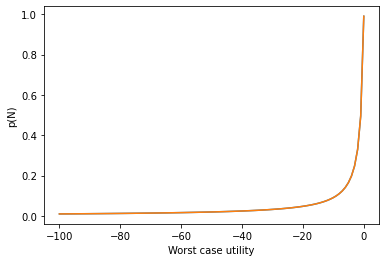

In [89]:
# plotting probs against 1/(-c1+1)

for i in range(Z.shape[0]):
    Z[i,1] = 1/(-c1[i]+1)

fig = plt.figure()
ax = plt.axes()
ax.set_ylabel("p(N)")
ax.set_xlabel("Worst case utility")
ax.plot(c1, Z)